In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

if str(keras.__version__)=='2.8.0':
  pass
else:
  print('You may run into issues running this code on Keras vesions other than 2.8.0')

# Classification Example
Function: [***Datasets***](https://keras.io/api/datasets/) in Keras


This is one of the handwriting digits of 5:



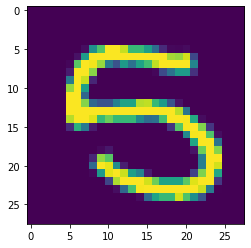

In [2]:
# Load MNIST dataset 
(x_train , y_train), (x_test , y_test) = keras.datasets.mnist.load_data()

# Standardize the data to have a spread of 1
x_train, x_test = x_train / 255, x_test / 255

# Pick a random integer/digit within the training set
random_digit = np.random.randint(0, len(x_train)-1)

# Plot the image of this digit for visualization and comparison after training
print("\nThis is one of the handwriting digits of \033[1m"+str(y_train[random_digit])+":\n")
plt.imshow(x_train[random_digit])
plt.show()

## Fully-Connected ANN

Sequential Class: [***Sequential***](https://keras.io/api/models/sequential/) in Keras

Summary Method: [***Summary***](https://keras.io/api/models/model/) in Keras


#### Layers

Layers  Class: [***Layers***](https://keras.io/api/layers/) in Keras

Flatten Layer: [***Flatten layer***](https://keras.io/api/layers/reshaping_layers/flatten/) in Keras

Dense Layer: [***Dense layer***](https://keras.io/api/layers/core_layers/dense/) in Keras


#### Layer Activation

Layer Activation: [***Layer activation functions***](https://keras.io/api/layers/activations/) in Keras

ReLU function: [***ReLU***](https://keras.io/api/layers/activations/) in Keras

Softmax function: [***Softmax***](https://keras.io/api/layers/activations/) in Keras



In [3]:
# Define the network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 12)                9420      
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
Total params: 9,550
Trainable params: 9,550
Non-trainable params: 0
_________________________________________________________________


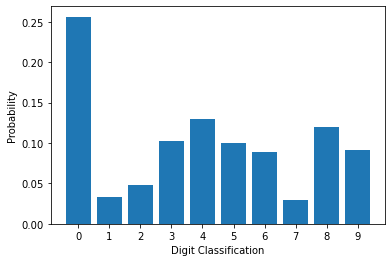

In [4]:
# Calculate the model prediction "before" training
pred = model(np.array(x_train[random_digit:random_digit+1], dtype=np.float32))

# Plot the predicted probability distribution
label = np.arange(0, len(pred[0]))
plt.bar(label, pred[0]) 
plt.xticks(label) 
plt.xlabel('Digit Classification')
plt.ylabel('Probability')
plt.show()

Compile Method: [***Compile***](https://keras.io/api/models/model_training_apis/) in Keras

Fit Method: [***Fit***](https://keras.io/api/models/model_training_apis/) in Keras

Predict Method: [***Predict***](https://keras.io/api/models/model_training_apis/) in Keras

Metrics arguments: [***Metrics***](https://keras.io/api/metrics/) in Keras

Accuracy arguments: [***Accuracy***](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) in Keras

Losses classes: [***Losses***](https://keras.io/api/losses/) in Keras

Sparse Categorical Crossentropy class: [***SparseCategoricalCrossentropy***](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class) in Keras

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model and record the history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4725 - accuracy: 0.8631 - val_loss: 0.2787 - val_accuracy: 0.9195
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2676 - accuracy: 0.9246 - val_loss: 0.2504 - val_accuracy: 0.9263
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2401 - accuracy: 0.9318 - val_loss: 0.2383 - val_accuracy: 0.9322
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2239 - accuracy: 0.9356 - val_loss: 0.2203 - val_accuracy: 0.9376
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2126 - accuracy: 0.9384 - val_loss: 0.2192 - val_accuracy: 0.9360
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2044 - accuracy: 0.9404 - val_loss: 0.2145 - val_accuracy: 0.9388
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1976 - accuracy: 0.9429 - val_loss: 0.2123 - val_accuracy:

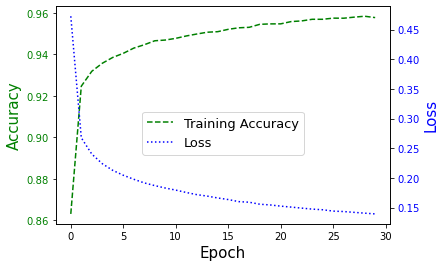

In [6]:
# Plot the accuracy based on the training/optimization history
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch', fontsize=15)
ax1.set_ylabel('Accuracy', color='g', fontsize=15)
ax1.plot(history.history['accuracy'], 'g--', label='Training Accuracy')
ax1.tick_params(axis='y', labelcolor='g')

# also plot the loss
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Loss', color='b', fontsize=15) 
ax2.plot(history.history['loss'], 'b:',label='Loss')
ax2.tick_params(axis='y', labelcolor='b')

fig.legend(loc='center', fontsize=13)
plt.show()

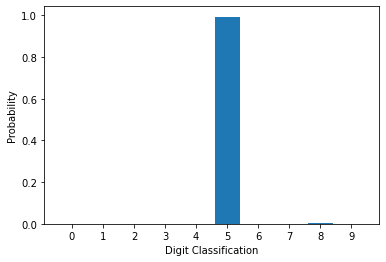

In [7]:
# Calculate the model prediction "before" training
pred = model(np.array(x_train[random_digit:random_digit+1], dtype=np.float32))

# Plot the predicted probability distribution
plt.bar(label, pred[0]) 
plt.xticks(label) 
plt.xlabel('Digit Classification')
plt.ylabel('Probability')
plt.show()

## Compare Optimizers for Training

In [8]:
def build_compile(optimizer):
    
    # Use the same network topology as last week
    model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)), 
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

    # compile the model with a cross-entropy loss and specify the given optimizer
    model.compile(optimizer=optimizer, loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
    return model

#### Optimizers

Optimizers arguments: [***Optimizers***](https://keras.io/api/optimizers/) in Keras

SGD Class: [***SGD***](https://keras.io/api/models/model_training_apis/) in Keras

SGD Class: [***Nesterov***](https://keras.io/api/models/model_training_apis/) in Keras

RMSprop Class: [***RMSprop***](https://keras.io/api/models/model_training_apis/) in Keras

Adam Class: [***Adam***](https://keras.io/api/models/model_training_apis/) in Keras

Adadelta Class: [***Adadelta***](https://keras.io/api/models/model_training_apis/) in Keras

Adagrad Class: [***Adagrad***](https://keras.io/api/models/model_training_apis/) in Keras

Adamax Class: [***Adamax***](https://keras.io/api/models/model_training_apis/) in Keras

Nadam Class: [***Nadam***](https://keras.io/api/models/model_training_apis/) in Keras

Ftrl Class: [***Ftrl***](https://keras.io/api/models/model_training_apis/) in Keras


In [9]:
# Generate an array of the different optimizers to iterate over in a for loop
optimizer_names = ['SGD','Momentum','Nesterov', 'RMSprop','Adagrad','Adam','NAdam']
optimizer_list = ['SGD',keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=False),keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True), 'RMSprop','Adagrad','Adam','NAdam']

# Arrays for training and validation performance
hist_acc = []
hist_val_acc = []
hist_loss = []
hist_val_loss = []

# Iterate over optimizers and train the network, using x_test and y_test as a validation set in each epoch
for name,item in zip(optimizer_names, optimizer_list):
    print("----------------------------------------------------------------------------------")
    print("Training the ANN with %s optimizer" %str(name))
    
    # Get the model from our function above
    model = build_compile(item)
    
    # Train the model
    seqModel = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))
    
    # Store the performance
    hist_acc.append(seqModel.history['accuracy'])
    hist_val_acc.append(seqModel.history['val_accuracy'])
    hist_loss.append(seqModel.history['loss'])
    hist_val_loss.append(seqModel.history['val_loss'])    

----------------------------------------------------------------------------------
Training the ANN with SGD optimizer
Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6223 - accuracy: 0.8426 - val_loss: 0.3601 - val_accuracy: 0.9013
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.9051 - val_loss: 0.2937 - val_accuracy: 0.9183
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2910 - accuracy: 0.9179 - val_loss: 0.2650 - val_accuracy: 0.9275
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2608 - accuracy: 0.9270 - val_loss: 0.2416 - val_accuracy: 0.9329
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2377 - accuracy: 0.9336 - val_loss: 0.2211 - val_accuracy: 0.9385
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2189 - accuracy: 0.9395 - val_loss: 0.2068 - val_accuracy: 0.9409
Epoch 7/30
1875/1

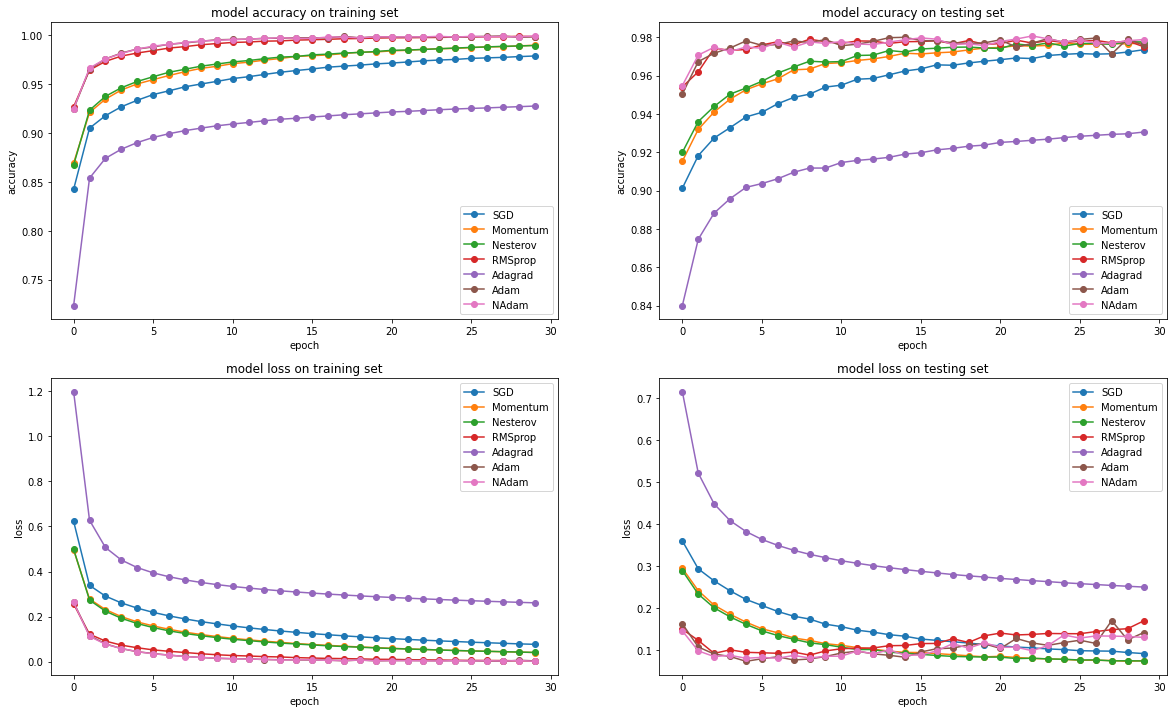

In [10]:
plt.figure(figsize=(20,12))

# summarize history for accuracy on training set
plt.subplot(221)
for i in range(len(optimizer_list)):
    plt.plot(hist_acc[i],'-o',label=str(optimizer_names[i]))
plt.title('model accuracy on training set')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

# summarize history for accuracy on test set
plt.subplot(222)
for i in range(len(optimizer_list)):
    plt.plot(hist_val_acc[i],'-o', label=str(optimizer_names[i]))
plt.title('model accuracy on testing set')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

# summarize history for loss on training set
plt.subplot(223)
for i in range(len(optimizer_list)):
    plt.plot(hist_loss[i],'-o',label=str(optimizer_names[i]))
plt.title('model loss on training set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

# summarize history for loss on test set
plt.subplot(224)
for i in range(len(optimizer_list)):
    plt.plot(hist_val_loss[i],'-o', label=str(optimizer_names[i]))
plt.title('model loss on testing set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

plt.show()

## Early Stopping

Callbacks API: [***Callbacks***](https://keras.io/api/callbacks/) in Keras

EarlyStopping Class: [***EarlyStopping***](https://keras.io/api/callbacks/early_stopping/) in Keras

In [11]:
# Build the model with early stopping
model_es = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), 
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(10, activation='softmax')])

# Compile the model and optimize with adam
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model_es.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model to the data while providing a validation set for each epoch
history_es = model_es.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2554 - accuracy: 0.9273 - val_loss: 0.1472 - val_accuracy: 0.9561
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1147 - accuracy: 0.9655 - val_loss: 0.0939 - val_accuracy: 0.9715
Epoch 2: early stopping


## Ridge (L2) Regularization

Layer weight regularizers: [***Layer weight regularizers***](https://keras.io/api/layers/regularizers/) in Keras

L2 Class: [***L2 class***](https://keras.io/api/layers/regularizers/#L2class) in Keras

In [12]:
# Build the model with an L2 regularization added to all weights

model_l2 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), 
                      keras.layers.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
                      keras.layers.Dense(10, activation='softmax',kernel_regularizer=keras.regularizers.l2(0.001))])

model_l2.summary()

# Compile the model and optimize with adam
model_l2.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model to the data while providing a validation set for each epoch
history_l2 = model_l2.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4184 - accuracy: 0.9203 - val_loss: 0.2886 - val_accuracy: 0.9527
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2894 - accuracy: 0.9551 - val_loss: 0.2632 - val_accuracy: 0.9632
Epoch 3/30
1875/1875 [==

## Dropout

Dropout Layer: [***Dropout***](https://keras.io/api/layers/regularization_layers/dropout/) in Keras

In [13]:
# Dropout

# Build the model with dropout
model_dropout = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), 
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dropout(.2),
                      keras.layers.Dense(10, activation='softmax'),
                      keras.layers.Dropout(.2)])

model_dropout.summary()

# Compile the model and optimize with adam
model_dropout.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model to the data while providing a validation set for each epoch
history_dropout = model_dropout.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1875/1875 [=========================

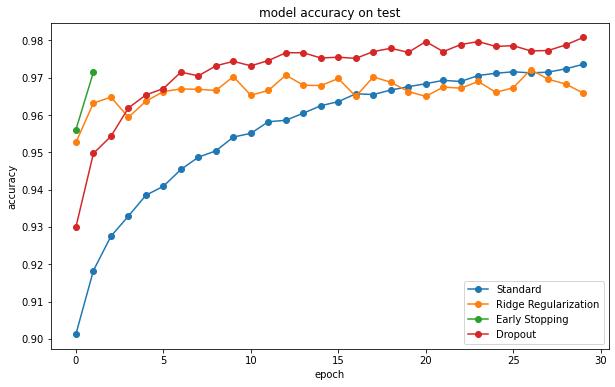

In [14]:
# plotting the accuracy curve for the cases of ridge regression, early stopping and dropout
plt.figure(figsize=(10,6))
plt.plot(hist_val_acc[0],'-o', label='Standard')
plt.plot(history_l2.history['val_accuracy'],'-o', label="Ridge Regularization")
plt.plot(history_es.history['val_accuracy'],'-o', label="Early Stopping")
plt.plot(history_dropout.history['val_accuracy'],'-o', label="Dropout")
plt.title('model accuracy on test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

# Regression Example


In [15]:
# import the data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers.experimental import preprocessing

In [16]:
#Download the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [17]:
# Process and show the data
dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [18]:
#Convert origin to numeric value
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [19]:
#Split data to training and testing 
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

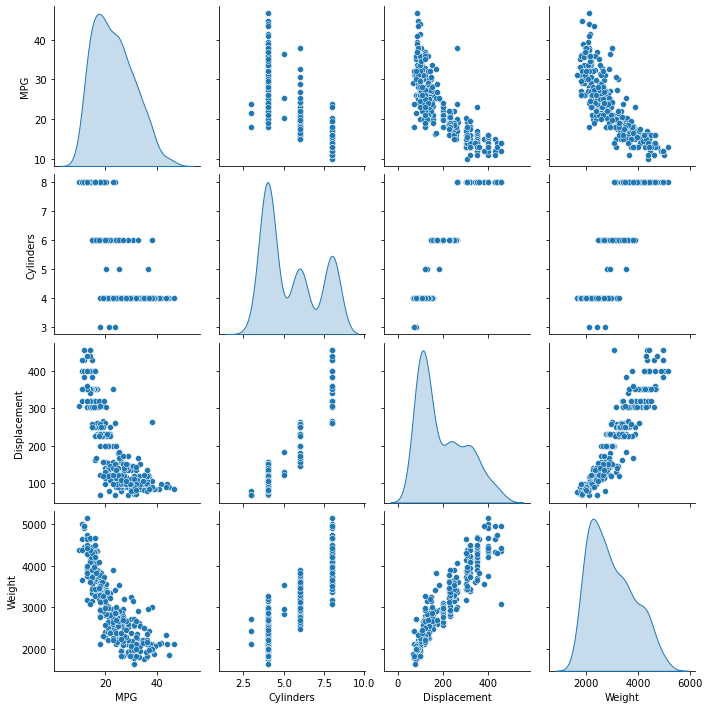

In [20]:
#Visualize the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

Normalization function: [***keras.layers.experimental.preprocessing.Normalization***](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization) in Tensorflow

In [21]:
#Separate the features (x) from the labels (y)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

#normalize data
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

Sequential Class: [***Sequential***](https://keras.io/api/models/sequential/) in Keras

Compile Method: [***Compile***](https://keras.io/api/models/model_training_apis/) in Keras

Fit Method: [***Fit***](https://keras.io/api/models/model_training_apis/) in Keras

Predict Method: [***Predict***](https://keras.io/api/models/model_training_apis/) in Keras

Adam Class: [***Adam***](https://keras.io/api/models/model_training_apis/) in Keras



In [22]:
# For comparison we will comprare a neural network to a linear model

#Create a linear model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(train_features[:10])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Sequential Class: [***Sequential***](https://keras.io/api/models/sequential/) in Keras

Compile Method: [***Compile***](https://keras.io/api/models/model_training_apis/) in Keras

Fit Method: [***Fit***](https://keras.io/api/models/model_training_apis/) in Keras

Predict Method: [***Predict***](https://keras.io/api/models/model_training_apis/) in Keras

Adam Class: [***Adam***](https://keras.io/api/models/model_training_apis/) in Keras



In [23]:
# Build a ANN model
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_23 (Dense)            (None, 64)                640       
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [24]:
#Compare the error of the linear model to that of ANN
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,2.510077
dnn_model,1.664920
